# Generate Topo

In [1]:
import geopandas as gpd
import rasterio
from rasterio import features
import xarray as xr
import rioxarray
from rasterio.enums import Resampling

import numpy as np
import matplotlib.pyplot as plt

from basin_setup.generate_topo.shapefile import Shapefile
from basin_setup.utils import config, domain_extent


# Loading shapefile

Load the shapefile and convert to a mask

[318550.0, 4157550.0, 329800.0, 4167900.0]
| 150.00, 0.00, 318550.00|
| 0.00,-150.00, 4167900.00|
| 0.00, 0.00, 1.00|


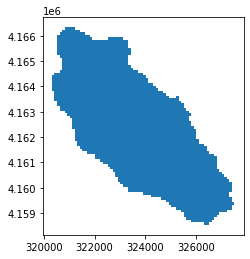

In [2]:
file_name = '../tests/Lakes/gold/basin_outline.shp'
cell_size = 150
# extents = [320200, 4158500, 327600, 4166350]
extents = [318550, 4157550, 329800, 4167900]
# extents, _ = domain_extent.parse_from_file(file_name)
extents = domain_extent.condition_to_cellsize(extents, cell_size=50)
transform, x, y = domain_extent.affine_transform_from_extents(extents, cell_size)

shape = Shapefile(file_name)
shape.polygon.plot()

print(extents)
print(transform)

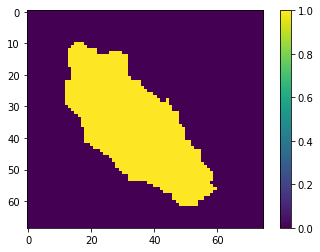

In [3]:
feat = features.rasterize(shape.polygon.geometry, out_shape=(len(y), len(x)), fill=0, transform=transform)

plt.imshow(feat)
plt.colorbar()

# Load DEM

Reproject and clip to the extents

([318520.405, 4157537.075, 329820.405, 4167937.075], 100.0)


<xarray.DataArray 'x' (x: 113)>
array([318570.405027, 318670.405027, 318770.405027, 318870.405027,
       318970.405027, 319070.405027, 319170.405027, 319270.405027,
       319370.405027, 319470.405027, 319570.405027, 319670.405027,
       319770.405027, 319870.405027, 319970.405027, 320070.405027,
       320170.405027, 320270.405027, 320370.405027, 320470.405027,
       320570.405027, 320670.405027, 320770.405027, 320870.405027,
       320970.405027, 321070.405027, 321170.405027, 321270.405027,
       321370.405027, 321470.405027, 321570.405027, 321670.405027,
       321770.405027, 321870.405027, 321970.405027, 322070.405027,
       322170.405027, 322270.405027, 322370.405027, 322470.405027,
       322570.405027, 322670.405027, 322770.405027, 322870.405027,
       322970.405027, 323070.405027, 323170.405027, 323270.405027,
       323370.405027, 323470.405027, 323570.405027, 323670.405027,
       323770.405027, 323870.405027, 323970.405027, 324070.405027,
       324170.405027, 324270.405027, 324370.405027, 324470.405027,
       324570.405027, 324670.405027, 324770.405027, 324870.405027,
       324970.405027, 325070.405027, 325170.405027, 325270.405027,
       325370.405027, 325470.405027, 325570.405027, 325670.405027,
       325770.405027, 325870.405027, 325970.405027, 326070.405027,
       326170.405027, 326270.405027, 326370.405027, 326470.405027,
       326570.405027, 326670.405027, 326770.405027, 326870.405027,
       326970.405027, 327070.405027, 327170.405027, 327270.405027,
       327370.405027, 327470.405027, 327570.405027, 327670.405027,
       327770.405027, 327870.405027, 327970.405027, 328070.405027,
       328170.405027, 328270.405027, 328370.405027, 328470.405027,
       328570.405027, 328670.405027, 328770.405027, 328870.405027,
       328970.405027, 329070.405027, 329170.405027, 329270.405027,
       329370.405027, 329470.405027, 329570.405027, 329670.405027,
       329770.405027])
Coordinates:
  * x            (x) float64 3.186e+05 3.187e+05 ... 3.297e+05 3.298e+05
    spatial_ref  int64 0

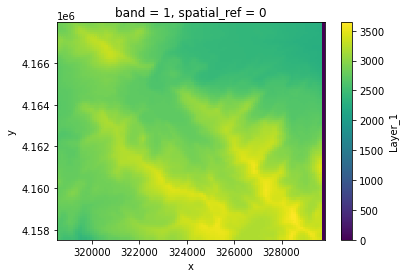

In [11]:
dem_file = '../tests/data/dem_epsg_32611_100m.tif'

print(domain_extent.parse_from_file(dem_file))

# Will be able to change this for xarray>0.18 if move up to newer python version
dem = rioxarray.open_rasterio(dem_file)
dem.plot()
dem.x

[318550.0, 4157550.0, 329800.0, 4167900.0]


<xarray.DataArray 'x' (x: 76)>
array([318595.405027, 318745.405027, 318895.405027, 319045.405027,
       319195.405027, 319345.405027, 319495.405027, 319645.405027,
       319795.405027, 319945.405027, 320095.405027, 320245.405027,
       320395.405027, 320545.405027, 320695.405027, 320845.405027,
       320995.405027, 321145.405027, 321295.405027, 321445.405027,
       321595.405027, 321745.405027, 321895.405027, 322045.405027,
       322195.405027, 322345.405027, 322495.405027, 322645.405027,
       322795.405027, 322945.405027, 323095.405027, 323245.405027,
       323395.405027, 323545.405027, 323695.405027, 323845.405027,
       323995.405027, 324145.405027, 324295.405027, 324445.405027,
       324595.405027, 324745.405027, 324895.405027, 325045.405027,
       325195.405027, 325345.405027, 325495.405027, 325645.405027,
       325795.405027, 325945.405027, 326095.405027, 326245.405027,
       326395.405027, 326545.405027, 326695.405027, 326845.405027,
       326995.405027, 327145.405027, 327295.405027, 327445.405027,
       327595.405027, 327745.405027, 327895.405027, 328045.405027,
       328195.405027, 328345.405027, 328495.405027, 328645.405027,
       328795.405027, 328945.405027, 329095.405027, 329245.405027,
       329395.405027, 329545.405027, 329695.405027, 329845.405027])
Coordinates:
  * x            (x) float64 3.186e+05 3.187e+05 ... 3.297e+05 3.298e+05
    spatial_ref  int64 0
Attributes:
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate
    units:          metre

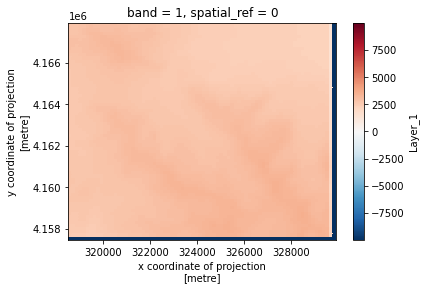

In [10]:
# reproject then clip
dem_upsampled = dem.rio.reproject(
    dem.rio.crs,
    resolution=150,
    resampling=Resampling.bilinear,
)

dem_upsampled.plot()
dem_upsampled.rio.resolution()
print(extents)
dem_upsampled.x
# d = dem - dem_upsampled
# dem_upsampled